In [30]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score

In [31]:
df = pd.read_csv(r'C:\Users\hb292\Downloads\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


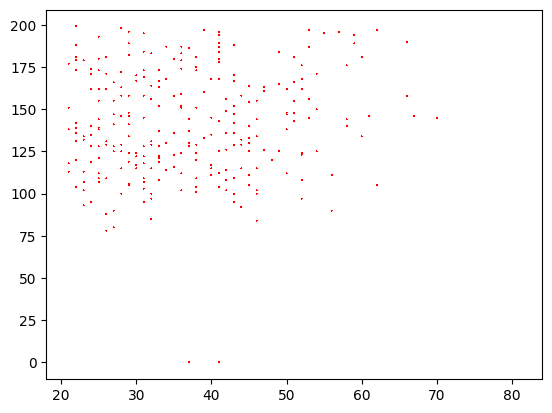

In [32]:
plt.scatter(df.Age, df.Glucose,df.Outcome,marker="+",color='red')

In [33]:
df.shape

(768, 9)

In [34]:
from sklearn.model_selection import train_test_split
X = df[['Age','Glucose']]
Y = df.Outcome
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)

In [35]:
X_test

,Age,Glucose
542,56,90
153,23,153
477,31,114
469,27,154
255,21,113
...,...,...
607,25,92
54,42,150
341,36,95
380,24,107


In [36]:
Y_train

333    0
641    0
26     1
279    0
92     0
      ..
253    0
228    0
23     1
235    1
61     1
Name: Outcome, Length: 614, dtype: int64

In [37]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [38]:
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [39]:
model.predict(X_test)

array([0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1])

In [40]:
model.score(X_test,Y_test)

0.8116883116883117

In [41]:
#probabilities betwween 0 and 1
model.predict_proba(X_test)

array([[0.75788124, 0.24211876],
       [0.47129848, 0.52870152],
       [0.73200602, 0.26799398],
       [0.43550383, 0.56449617],
       [0.78826994, 0.21173006],
       [0.13611127, 0.86388873],
       [0.29074055, 0.70925945],
       [0.88240194, 0.11759806],
       [0.75050572, 0.24949428],
       [0.22274551, 0.77725449],
       [0.23728896, 0.76271104],
       [0.81030107, 0.18969893],
       [0.66731188, 0.33268812],
       [0.96346755, 0.03653245],
       [0.87350442, 0.12649558],
       [0.64075047, 0.35924953],
       [0.76187242, 0.23812758],
       [0.55005628, 0.44994372],
       [0.76548365, 0.23451635],
       [0.38895545, 0.61104455],
       [0.82662187, 0.17337813],
       [0.90919987, 0.09080013],
       [0.67028398, 0.32971602],
       [0.89198346, 0.10801654],
       [0.70420129, 0.29579871],
       [0.33647582, 0.66352418],
       [0.51903519, 0.48096481],
       [0.75813769, 0.24186231],
       [0.49162724, 0.50837276],
       [0.88522921, 0.11477079],
       [0.

In [43]:
y_pred = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(Y_test,  y_pred)

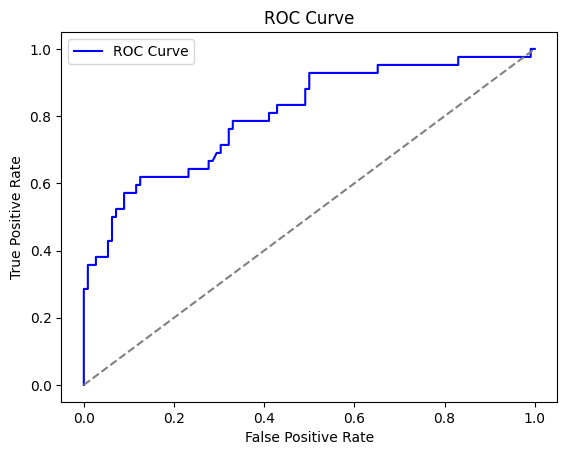

In [44]:
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [45]:
auc = roc_auc_score(Y_test, y_pred)
print("AUC:", auc)

AUC: 0.8045280612244897
